In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Univariate Linear Regression

In [4]:
data=pd.read_csv("Linear Regression/ex1data1.txt", header=None)
data.head()

,0,1
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [5]:
data.describe()

,0,1
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


In [6]:
data.columns = ['Population', 'Profit'] #assigning column names

Text(0.5, 1.0, 'Profit vs Population')

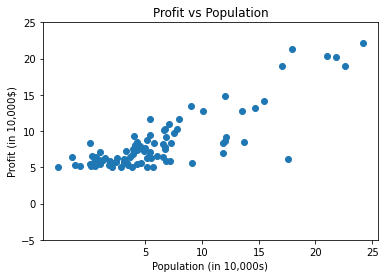

In [13]:
plt.scatter(data['Population'], data['Profit'])
plt.xticks(np.arange(5,30,step=5))
plt.yticks(np.arange(-5,30,step=5))
plt.xlabel('Population (in 10,000s)')
plt.ylabel('Profit (in 10,000$)')
plt.title('Profit vs Population')

## Cost Function  J(θ)

In [43]:
def computeCost(X,y,theta):
    """
    Take in a numpy arary X,y,theta and get cost function using theta as parameter in a linear regression model
    """
    m = len(y)
    predictions = X.dot(theta)
    square_err = (predictions - y)**2
    
    return 1/(m)*np.sum(square_err)

In [44]:
data['x0'] = 1

In [45]:
data_val = data.values
m =  len(data_val[:-1])
X = data[['x0','Population']].iloc[:-1].values
y = data['Profit'][:-1].values.reshape(m,1)
theta = np.zeros((2,1))

m, X.shape, y.shape, theta.shape

(96, (96, 2), (96, 1), (2, 1))

In [46]:
# h(θ) = x0θ0 +x1θ1 ....(x0 = 1)

In [47]:
computeCost(X,y,theta)

81.94398512635416

## Gradient Descent

In [52]:
def gradientDescent(X,y,theta,alpha,num_iters):
    """
    Take numpy array for X,y,theta and update theta for every iteration of gradient steps
    Return theta and the list of cost of theta during each iteration
    """
    
    m = len(y)
    J_history = []
    for i in range(num_iters):
        predictions = X.dot(theta)
        error = np.dot(X.transpose(), (predictions-y))
        descent = alpha * 1/m * error
        theta-=descent
        J_history.append(computeCost(X,y,theta))
        
    return theta, J_history

In [53]:
theta, J_history = gradientDescent(X,y,theta,0.001, 2000)

In [55]:
print(f"h(x) = {str(round(theta[0,0],2))} + {str(round(theta[1,0],2))}x1")

h(x) = 2.88 + 0.76x1


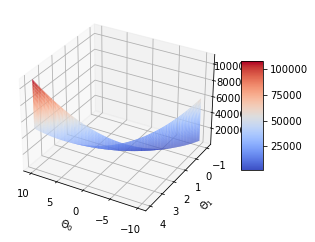

In [56]:
from mpl_toolkits.mplot3d import Axes3D
#Generating values for theta0, theta1 and the resulting cost value
theta0_vals=np.linspace(-10,10,100)
theta1_vals=np.linspace(-1,4,100)
J_vals=np.zeros((len(theta0_vals),len(theta1_vals)))
for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        t=np.array([theta0_vals[i],theta1_vals[j]])
        J_vals[i,j]=computeCost(X,y,t)
#Generating the surface plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf=ax.plot_surface(theta0_vals,theta1_vals,J_vals,cmap="coolwarm")
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel("$\Theta_0$")
ax.set_ylabel("$\Theta_1$")
ax.set_zlabel("$J(\Theta)$")
#rotate for better angle
ax.view_init(30,120)

Text(0.5, 1.0, 'Cost function using Gradient Descent')

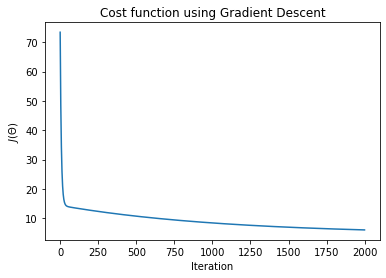

In [59]:
plt.plot(J_history)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")

Text(0.5, 1.0, 'Profit vs Population')

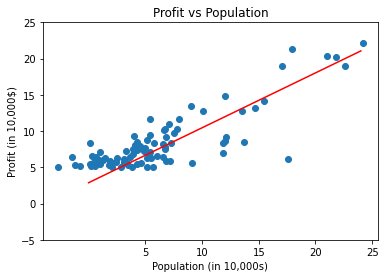

In [60]:
plt.scatter(data['Population'], data['Profit'])
x_value = [x for x in range(25)]
y_value = [x*theta[1] + theta[0] for x in x_value]
plt.plot(x_value, y_value, color = 'r')
plt.xticks(np.arange(5,30,step=5))
plt.yticks(np.arange(-5,30,step=5))
plt.xlabel('Population (in 10,000s)')
plt.ylabel('Profit (in 10,000$)')
plt.title('Profit vs Population')

In [61]:
def predict(x,theta):
    """
    Takes in numpy array x and theta and returns predicted value of y
    """
    predictions = np.dot(theta.transpose(),x)
    return predictions[0]
    

In [62]:
data.tail(1)

,Profit,Population,x0
96,5.4369,0.61705,1


In [79]:
predict1 = predict(data[['x0','Population']].iloc[-1].values, theta)*10000
print(f'For a population of 6170 the predicted profit is ${predict1}')

For a population of 6170 the predicted profit is $33425.787565695806


# TODO: Configure code for multivariate linear regression